In [10]:
import numpy as np
import scipy as scipy
import math as math
from scipy.optimize import root
import matplotlib.pyplot as plt
#from Library_term_project import *

In [11]:
#crank-nicolson method
def crank_nicolson(g: callable,a: callable, b: callable, x0: float, x_m: float, t0: float, t_m: float, N_x: int, N_t: int,req_time_step: int,iflist=True,k=1):
    '''
    # Crank Nicolson Method
    for solving the heat equation of the form u_xx = k*u_t
    ## Parameters
    - g: Initial condition function u(x,t=0) = g(x)
    - a: Boundary condition function u(x=0,t) = a(t)
    - b: Boundary condition function u(x=x_m,t) = b(t)
    - x0: Initial value of x
    - x_m: Final value of x
    - t0: Initial value of t
    - t_m: Final value of t
    - N_x: Number of steps to divide the interval [x0,x_m]
    - N_t: Number of steps to divide the interval [t0,t_m]
    - req_time_step: The time step to which the solution is to be calculated
    - iflist: If True, the function will return the list of u values, if False, the function will return u as a column matrix or a vector
    - k: The thermal diffusivity
    ## Returns
    - x: List of x values
    - t: List of t values
    - u: List of List of u values or vector depending on the value of iflist
    '''
    hx = (x_m - x0) / N_x
    ht = (t_m - t0) / N_t
    x=[x0 + i*hx for i in range(1,N_x)]
    alpha = (ht / (hx**2))/k  
    u = [[g(i)] for i in x]
    B = [[0 for i in range(N_x-1)] for j in range(N_x-1)]    
    I = [[0 for i in range(N_x-1)] for j in range(N_x-1)]   
    for i in range(len(B)):
        for j in range(len(B[i])):
            if i==j:
                B[i][j]=2*alpha
                I[i][j]=2
            elif abs(i-j)==1:
                B[i][j]=-1*alpha

    matrix1=[[I[i][j]-B[i][j] for j in range(N_x-1)] for i in range(N_x-1)]
    matrix2=[[I[i][j]+B[i][j] for j in range(N_x-1)] for i in range(N_x-1)] 
    matrix21=np.linalg.inv(matrix2)
    del matrix2
    matrix3=np.matmul(matrix21,matrix1)     
    del matrix1,matrix21
    matrix4=np.linalg.matrix_power(matrix3,req_time_step)
    del matrix3
    v_req = np.matmul(matrix4,u).tolist()
    del matrix4
    v_req.insert(0,[a(t0)])
    v_req.append([b(t0)])
    x.insert(0,x0)
    x.append(x_m)
    ulist=[]
    if iflist==False:
        return x,v_req,[t0 + i*ht for i in range(N_t+1)]
    else:
        for i in range(len(v_req)):
            ulist.append(v_req[i][0])        
        return x,ulist,[t0 + i*ht for i in range(req_time_step+1)]
    

In [12]:
def initfn(z,t):
    def expression(n,z,t):
        return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/Lc)*np.exp(-(((2*n-1)*np.pi/Lc)**2)*lamda/c*t)

    ab = np.sum(expression(np.arange(start, end+1),z,t))
    #print(ab)
    ans=(((ab*2/np.pi)+0.5)*Tu)+((0.5-(ab*2/np.pi))*Tl)
    return ans

In [13]:
Tu=10
Tl=20
lamda=2
c=4174000
#c=2104000
#t=86400

Lc=4
Lu=0
l=0.01
nz=int((Lc-Lu)/l)
zlist = np.linspace(Lu, Lc, nz+1)

t_i = 0    
t_f = 189
nt = 16329600


start = 1
end = 10000

def g(z):
    return initfn(z,t_i)
def a(t):
    return initfn(Lu,t)
def b(t):
    return initfn(Lc,t)


In [14]:
print(g(5))
print(a(0))
print(b(0))

x_values, B_values, time_values = crank_nicolson(g,a,b,Lu,Lc,t_i,t_f, nz, nt, 34)

19.999774920922693
10.000159154942697
19.999840845057303


In [15]:
def plot_crank_nicolson(g,a,b,Lu,Lc,t_i,t_f, nz, nt, time_points):
    
    for time_point in time_points:
        x_values, B_values, time_values = crank_nicolson(g,a,b,Lu,Lc,t_i,t_f, nz, nt, time_point)
        plt.plot(B_values,x_values,  label="t = " + str(round(time_values[time_point], 2)))
        del x_values, B_values, time_values

    plt.legend()
    plt.ylabel("Position (x)")
    plt.xlabel("B_phi")
    plt.grid()
    plt.show()

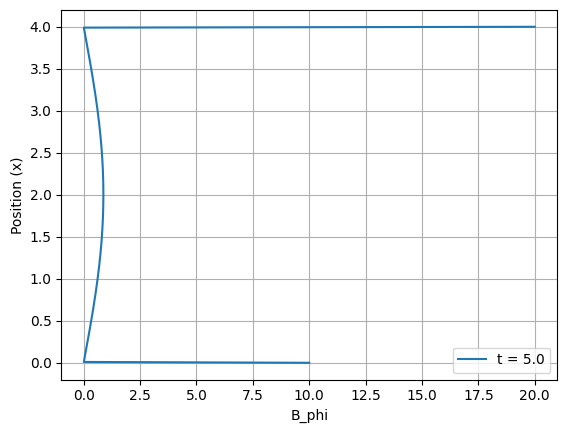

In [18]:
time_points = [432000]
plot_crank_nicolson(g,a,b,Lu,Lc,t_i,t_f, nz, nt, time_points)
